In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
#########
# for loading the csv  file
import matplotlib.pyplot as plt
import matplotlib
from google.colab import files
import io
############## general dependencies ####################################
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
#distinct value counter
from collections import Counter

In [5]:
data = files.upload()

Saving diamonds.csv to diamonds (1).csv


In [6]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Load the data into a Pandas DataFrame
df= pd.read_csv(io.StringIO(data['diamonds.csv'].decode('utf-8')))

# Display sample data
df.head(10)
# Review the DataFrame

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,b'Very Good',b'J',b'VVS2',62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,b'Very Good',b'I',b'VVS1',62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,b'Very Good',b'H',b'SI1',61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,b'Fair',b'E',b'VS2',65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,b'Very Good',b'H',b'VS1',59.4,61.0,338.0,4.00,4.05,2.39


In [7]:
df_dup = df.drop(columns = ['depth', 'table', "'x'", "'y'", "'z'"])

In [8]:
dropable = df_dup[df_dup.duplicated()]
dropable

,carat,cut,color,clarity,price
18,0.30,b'Good',b'J',b'SI1',351.0
24,0.31,b'Very Good',b'J',b'SI1',353.0
31,0.23,b'Very Good',b'F',b'VS1',402.0
33,0.23,b'Very Good',b'E',b'VS1',402.0
40,0.33,b'Ideal',b'I',b'SI2',403.0
...,...,...,...,...,...
53909,0.70,b'Very Good',b'E',b'SI1',2753.0
53910,0.70,b'Premium',b'E',b'SI1',2753.0
53921,0.70,b'Very Good',b'E',b'VS2',2755.0
53924,0.73,b'Ideal',b'I',b'VS2',2756.0


In [9]:
#removing the  "b'" in front of cut,color and clarity as this might not be helpful
df['color'] = df['color'].str.replace("b'",'')
df['cut'] =df['cut'].str.replace("b'", '')
df['clarity'] = df['clarity'].str.replace("b'", '')
df['color'] = df['color'].str.replace("'", '')
df['cut'] = df['cut'].str.replace("'", '')
df['clarity'] =df['clarity'].str.replace("'", '')
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [10]:
drop_list = [i for i,row in dropable.iterrows()]
drop_list

[18,
 24,
 31,
 33,
 40,
 47,
 58,
 63,
 73,
 78,
 80,
 87,
 115,
 124,
 129,
 141,
 157,
 160,
 181,
 183,
 190,
 194,
 195,
 196,
 197,
 201,
 202,
 206,
 246,
 260,
 264,
 267,
 289,
 290,
 295,
 309,
 321,
 322,
 335,
 343,
 351,
 354,
 365,
 378,
 389,
 390,
 391,
 393,
 395,
 396,
 397,
 398,
 399,
 400,
 402,
 406,
 409,
 411,
 420,
 421,
 436,
 437,
 438,
 456,
 457,
 459,
 463,
 464,
 471,
 483,
 484,
 489,
 490,
 496,
 501,
 502,
 503,
 505,
 506,
 507,
 509,
 524,
 532,
 540,
 553,
 598,
 600,
 602,
 603,
 604,
 608,
 610,
 611,
 612,
 617,
 619,
 631,
 637,
 642,
 657,
 704,
 720,
 721,
 725,
 726,
 731,
 732,
 733,
 734,
 735,
 738,
 741,
 743,
 745,
 752,
 760,
 763,
 776,
 786,
 808,
 809,
 810,
 811,
 812,
 824,
 835,
 836,
 869,
 870,
 883,
 884,
 885,
 889,
 892,
 893,
 894,
 899,
 908,
 917,
 930,
 951,
 956,
 963,
 985,
 1004,
 1005,
 1006,
 1007,
 1008,
 1031,
 1032,
 1043,
 1044,
 1050,
 1056,
 1058,
 1060,
 1062,
 1064,
 1065,
 1066,
 1068,
 1069,
 1070,
 1071,
 

In [11]:
df.drop(drop_list, inplace = True)
df.reset_index(inplace=True, drop=True)
df.drop(columns=["'x'", "'y'", "'z'"], inplace=True)
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0
2,0.23,Good,E,VS1,56.9,65.0,327.0
3,0.29,Premium,I,VS2,62.4,58.0,334.0
4,0.31,Good,J,SI2,63.3,58.0,335.0
...,...,...,...,...,...,...,...
39751,0.72,Ideal,D,SI1,60.8,57.0,2757.0
39752,0.72,Good,D,SI1,63.1,55.0,2757.0
39753,0.70,Very Good,D,SI1,62.8,60.0,2757.0
39754,0.86,Premium,H,SI2,61.0,58.0,2757.0


In [12]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        182
table        126
price      11602
dtype: int64

In [13]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

In [14]:
df.head(10)

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
6,0.24,62.3,57.0,336.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7,0.26,61.9,55.0,337.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8,0.22,65.1,61.0,337.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.23,59.4,61.0,338.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#df.to_csv('Resources/cleaned.csv')
columns = df.columns.to_list()

In [18]:
scaler = StandardScaler()
scaler_new = scaler.fit(df)
scaled_df = pd.DataFrame(scaler_new.transform(df), columns = columns)

In [19]:
scaled_df.head(10)

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.405572,-0.156729,-1.120720,-1.038223,-0.197533,-0.342592,1.305138,-0.566777,-0.568675,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,-0.574252,2.004444,-0.421931,-0.510935,-0.254255,-0.308898
1,-1.447307,-1.265593,1.490024,-1.038223,-0.197533,-0.342592,-0.766202,1.764362,-0.568675,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
2,-1.405572,-3.157185,3.230521,-1.037985,-0.197533,2.918924,-0.766202,-0.566777,-0.568675,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,-0.574252,-0.498891,2.370058,-0.510935,-0.254255,-0.308898
3,-1.280367,0.430317,0.184652,-1.036319,-0.197533,-0.342592,-0.766202,1.764362,-0.568675,-0.364344,...,2.779237,-0.263711,-0.134557,-0.172747,-0.574252,-0.498891,-0.421931,1.957197,-0.254255,-0.308898
4,-1.238632,1.017363,0.184652,-1.036081,-0.197533,2.918924,-0.766202,-0.566777,-0.568675,-0.364344,...,-0.359811,3.792031,-0.134557,-0.172747,-0.574252,2.004444,-0.421931,-0.510935,-0.254255,-0.308898
5,-1.384705,0.691227,-0.250472,-1.035843,-0.197533,-0.342592,-0.766202,-0.566777,1.758473,-0.364344,...,-0.359811,3.792031,-0.134557,-0.172747,-0.574252,-0.498891,-0.421931,-0.510935,-0.254255,3.237317
6,-1.384705,0.365090,-0.250472,-1.035843,-0.197533,-0.342592,-0.766202,-0.566777,1.758473,-0.364344,...,2.779237,-0.263711,-0.134557,-0.172747,-0.574252,-0.498891,-0.421931,-0.510935,3.933056,-0.308898
7,-1.342970,0.104181,-1.120720,-1.035605,-0.197533,-0.342592,-0.766202,-0.566777,1.758473,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,1.741395,-0.498891,-0.421931,-0.510935,-0.254255,-0.308898
8,-1.426440,2.191455,1.490024,-1.035605,5.062437,-0.342592,-0.766202,-0.566777,-0.568675,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,-0.574252,-0.498891,-0.421931,1.957197,-0.254255,-0.308898
9,-1.405572,-1.526502,1.490024,-1.035367,-0.197533,-0.342592,-0.766202,-0.566777,1.758473,-0.364344,...,-0.359811,-0.263711,-0.134557,-0.172747,-0.574252,-0.498891,2.370058,-0.510935,-0.254255,-0.308898


In [20]:
#scaled_df.to_csv('Resources/scaled.csv')


# Linear Regression Model

Create Y and x matrices

In [23]:
X = scaled_df.drop(columns=['price'])
y= scaled_df['price']


In [24]:
X.shape,y.shape

((39756, 23), (39756,))

Data Split

In [25]:
#splitting dataset
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size= 0.20)

Data Dimensions

In [26]:
X_train.shape,X_test.shape

((31804, 23), (7952, 23))

In [27]:
y_train.shape,y_test.shape

((31804,), (7952,))

Linear Model

In [28]:
#dependencies
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

creating and defining the Lin_regres model

In [30]:
model = linear_model.LinearRegression()

Building training model

In [31]:
model.fit(X_train, y_train)

LinearRegression()

applying trained model on our test dataset

In [32]:
y_pred = model.predict(X_test)

Prediction results

Perfomance test

In [34]:
print('Coefficients:',model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error(MSE): %.2f'
      % mean_squared_error(y_test,y_pred))
print('Coefficient of Determination (R^2): %.2f'
      % r2_score(y_test,y_pred))

Coefficients: [ 1.04303495e+00 -1.28588520e-02 -1.73571026e-02  3.41983608e+11
  5.51529941e+11  8.68434410e+11  7.71650011e+11  7.72973264e+11
  3.45908659e+11  4.02187465e+11  4.09636759e+11  4.27529067e+11
  3.96430329e+11  3.42597948e+11  2.65162727e+11  6.25305620e+10
  7.93633624e+10  2.04318601e+11  1.88999772e+11  1.69459784e+11
  1.91695545e+11  1.12991321e+11  1.33418283e+11]
Intercept: -0.00031923659715240964
Mean Squared Error(MSE): 0.09
Coefficient of Determination (R^2): 0.91


A Coeficient of Determination of 0.91 is a fairly good outcome as this means our model is 91% correct at making predictions

string formating to decimal points 

In [35]:
r2_score(y_test,y_pred)

0.9123006014421265

In [ ]:
r2_score(y_test,y_pred).dtype

using modulo operation to format the numbers

In [36]:
'%f' % 0.9123006014421265

'0.912301'

In [63]:
#rounding to 2d.p
'%.2f' % 0.9123006014421265

'0.91'

visualisations and scatter plot using matplotlib

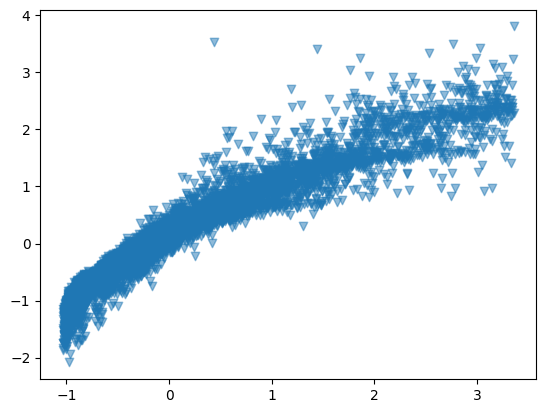

In [64]:
plt.scatter(y_test, y_pred, alpha=0.5,marker = "v")